In [1]:
import pandas as pd

#### 分组groupby的as_index作用

In [8]:
movie = pd.read_csv('./data/movie.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
movie.groupby('color').count()
# 不设置as_index, 默认值true，会把分组的字段作为索引

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
color,,,,,,,,,,,,,,,,,,,,,
Black and White,201,204,204,201,204,204,204,136,204,204,...,204,201,204,189,185,201,204,204,199,204
Color,4596,4647,4679,4596,4672,4681,4686,3916,4693,4686,...,4674,4690,4690,4414,4233,4594,4681,4693,4384,4693


In [7]:
# 设置了as_index=False,不实用字段作为索引
movie.groupby('color', as_index=False).count()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Black and White,201,204,204,201,204,204,204,136,204,...,204,201,204,189,185,201,204,204,199,204
1,Color,4596,4647,4679,4596,4672,4681,4686,3916,4693,...,4674,4690,4690,4414,4233,4594,4681,4693,4384,4693


#### plot 的kind
kind : str
        The kind of plot to produce:

        - 'line' : line plot (default)
        - 'bar' : vertical bar plot
        - 'barh' : horizontal bar plot
        - 'hist' : histogram
        - 'box' : boxplot
        - 'kde' : Kernel Density Estimation plot
        - 'density' : same as 'kde'
        - 'area' : area plot
        - 'pie' : pie plot
        - 'scatter' : scatter plot (DataFrame only)
        - 'hexbin' : hexbin plot (DataFrame only)

In [17]:
d_name = movie.groupby('color')[['director_name']].count()

##### df与series绘图的区别

<Axes: xlabel='color'>

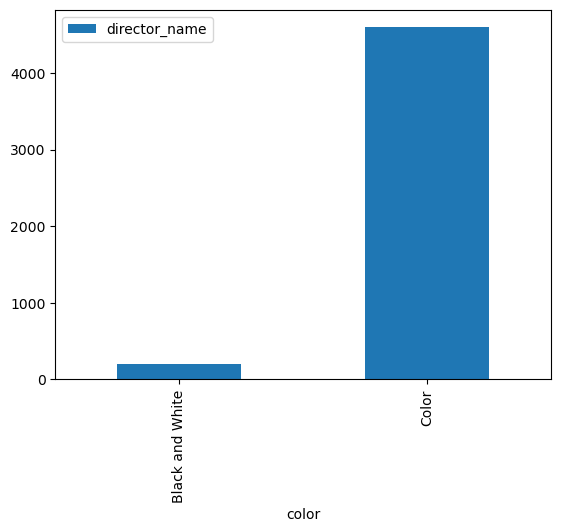

In [15]:
movie.groupby('color')[['director_name']].count().plot(kind='bar')

<Axes: xlabel='color'>

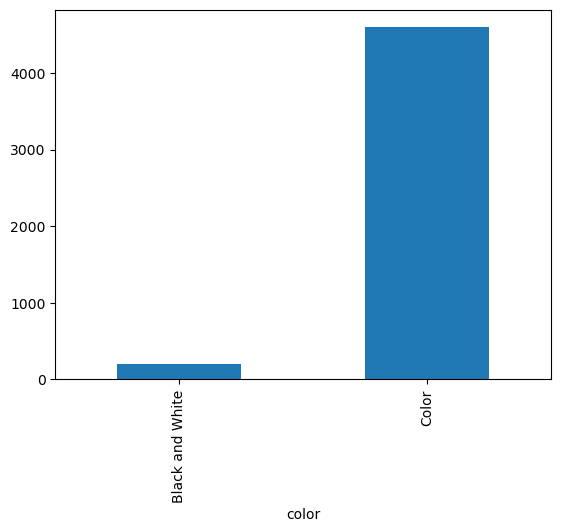

In [16]:
movie.groupby('color')['director_name'].count().plot(kind='bar')

### 聚合函数agg
**agg {'字段1': '聚合方法', '字段2': '聚合方法', ...} 可以对不同字段进行不同的聚合方法**

In [19]:
import numpy as np
df = pd.DataFrame(np.random.randint(1, 10, (3, 5)), columns=['col_1', 'col_2', 'col_3', 'col_4', 'col_5'])
df

,col_1,col_2,col_3,col_4,col_5
0,2,9,6,1,6
1,7,4,7,5,9
2,9,5,8,7,4


In [21]:
df.agg({'col_1':'sum','col_2':'mean','col_3':'min','col_4':'max','col_5':'std'})

col_1    18.000000
col_2     6.000000
col_3     6.000000
col_4     7.000000
col_5     2.516611
dtype: float64

In [23]:
# df.insert()

### df操作方法：insert()插入一列
- loc: 插入列的位置索引
- column：列名
- value：插入数据
- allow_duplicates: 是否能重复列名

In [27]:
df1 = pd.DataFrame(
    {'col_1':[1, 1], 'col_2':[2, 2]}
)
df1

,col_1,col_2
0,1,2
1,1,2


In [28]:
df1.insert(0, 'new_col', [5, 5])
df1

,new_col,col_1,col_2
0,5,1,2
1,5,1,2


In [29]:
# 再次插入相同列名会报错，如果需要的话，设置allow_duplicates=True

In [30]:
df1.insert(3, 'new_col', [6, 6], allow_duplicates=True)
df1

,new_col,col_1,col_2,new_col
0,5,1,2,6
1,5,1,2,6


#### 如果插入series， 指定了index， 按指定index插入，必须与插入数据行数相同
**如果指定插入的行数不再当前数据范围内，会出先nan值，并切会丢弃不存在index的值**

In [33]:
df1.insert(1, 'set_index', pd.Series([7, 7], index=[1, 2]))
df1

,new_col,set_index,col_1,col_2,new_col
0,5,NaN,1,2,6
1,5,7.0,1,2,6


# pandas的优势
- 增强数据的可读性
- 便捷的数据处理能力
- 读取文件方便
- 封装了matplotlib， numpy的画图和计算

In [1]:
## 随机数采样，随机数打乱顺序

NameError: name 'git' is not defined